Question 1

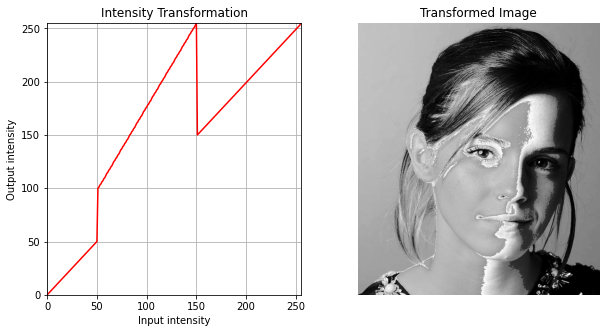

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0,c[0,1],c[0,1]+1-0).astype('uint8')
t2 = np.linspace(c[0,0],255,c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0],255,255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

im_org = cv.imread("C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)
im_transf = cv.LUT(im_org, transform)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the lookup table
ax[0].plot(transform, 'r', label='Identity')
ax[0].set_title('Intensity Transformation')
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xlabel('Input intensity')
ax[0].set_ylabel('Output intensity')

#Plot transformed Image
ax[1].imshow(im_transf, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

plt.show()

Question 2

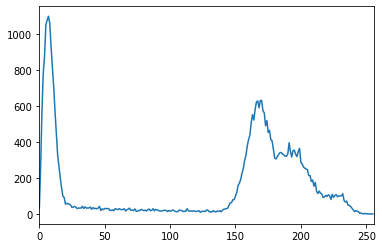

In [45]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
hist=cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()


(0.0, 255.0)

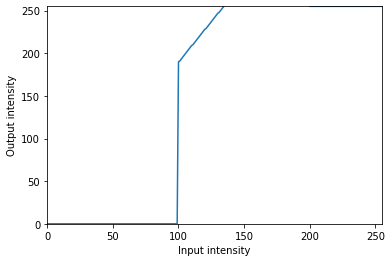

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_org = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

pixels = np.arange(0,256)
pixels[0:100] = 0
pixels[100:200] = 1.9*pixels[100:200]
pixels[200:256] = 255

def intensity_trans(img):
    img_transf = np.zeros_like(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_transf[i,j] = pixels[img[i,j]]
    return img_transf

img_transf = intensity_trans(img_org)

fig, ax = plt.subplots()
ax.plot(pixels)
ax.set_xlabel("Input intensity")
ax.set_ylabel("Output intensity")
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)

Text(0.5, 1.0, 'Transformed Image')

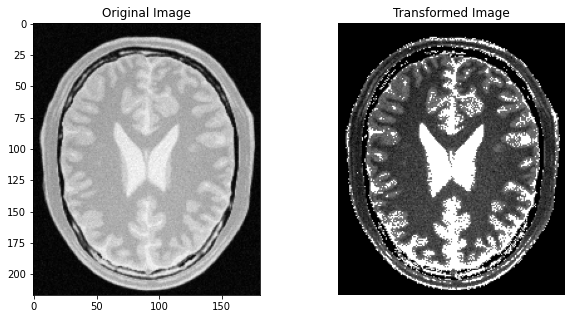

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#Plot original Image
ax[0].imshow(img_org, cmap='gray')
ax[0].set_title('Original Image')

#Plot transformed Image
ax[1].imshow(img_transf, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

Text(0.5, 1.0, 'Transformed Image')

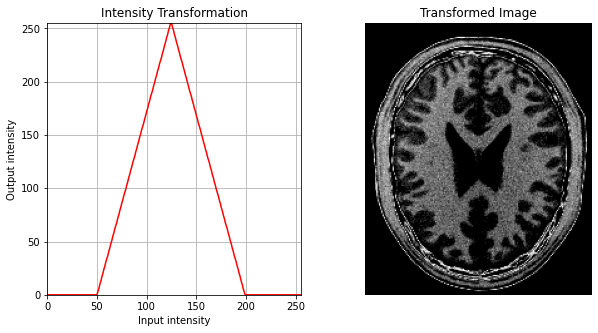

In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(125,50),(75,200)])

t1 = np.linspace(0,0,c[0,1]).astype('uint8')
t2 = np.linspace(0,255,c[1,0]).astype('uint8')
t3 = np.linspace(255,0,c[1,0]).astype('uint8')
t4 = np.linspace(0,0,c[0,1]+6).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the lookup table
ax[0].plot(transform, 'r', label='Identity')
ax[0].set_title('Intensity Transformation')
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xlabel('Input intensity')
ax[0].set_ylabel('Output intensity')


im_transf = cv.LUT(img_org, transform)

#Plot transformed Image
ax[1].imshow(im_transf, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Transformed Image')

Question 3

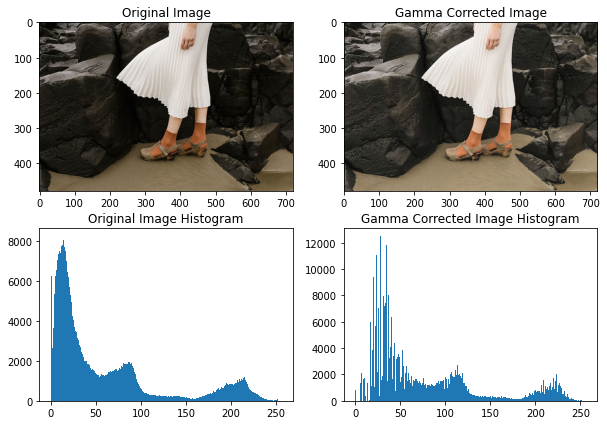

In [145]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_org = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

img_lab = cv.cvtColor(img_org, cv.COLOR_BGR2LAB)
img_lab_planes = cv.split(img_lab)#
img_l = img_lab_planes[0]

#Adjust Gamma Values
gamma = 0.7
#Gamma Correction
img_l_gamma = np.power((img_l/255),gamma)*255

#Updating L channel with gamma-corrected values
img_lab_gamcor = cv.merge((img_l_gamma.astype('uint8'), img_lab_planes[1].astype('uint8'), img_lab_planes[2].astype('uint8')))
img_gamma = cv.cvtColor(img_lab_gamcor, cv.COLOR_LAB2BGR)

#Display the orig and transf images and relevant histogram
fig, ax = plt.subplots(2,2,figsize=(10,7))
ax[0,0].imshow(img_org[:,:,::-1])     #RGB to BGR
ax[0,0].set_title('Original Image')
ax[0,1].imshow(img_gamma[:,:,::-1])   #RGB to BGR
ax[0,1].set_title('Gamma Corrected Image')
ax[1,0].hist(img_org[:,:,0].ravel(), 256, [0,256])
ax[1,0].set_title('Original Image Histogram')
ax[1,1].hist(img_gamma[:,:,0].ravel(), 256, [0,256])
ax[1,1].set_title('Gamma Corrected Image Histogram')
plt.show()



Question 4

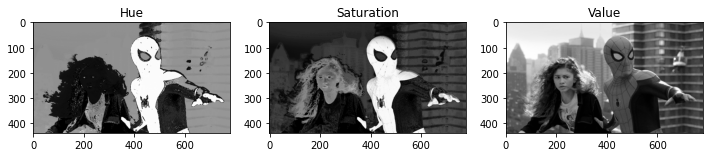

In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/spider.png', cv.IMREAD_COLOR)

# Split into HSV channels
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_h, img_s ,img_v = cv.split(img_hsv)

#plot h,s,v plane images

fig, ax = plt.subplots(1,3, figsize=(12,7))
ax[0].imshow(img_h, cmap ='gray')
ax[0].set_title('Hue')
ax[1].imshow(img_s, cmap ='gray')
ax[1].set_title('Saturation')
ax[2].imshow(img_v, cmap ='gray')
ax[2].set_title('Value')
plt.show()



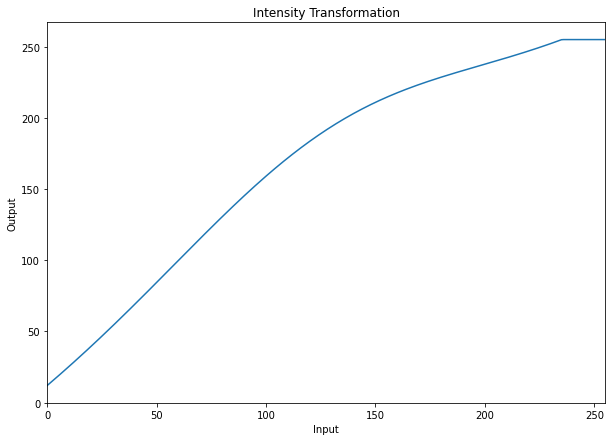

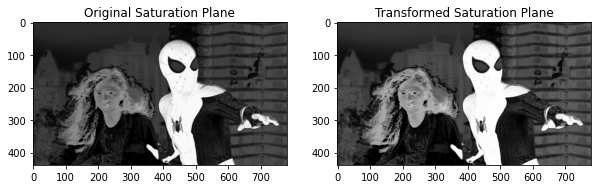

In [51]:
a = 0.5
sigma = 70

def f(x,a):
    sec_1 = x + a*128*np.exp((-1)*((x-128)**2)/(2*(sigma)**2))
    minimum = min(255, sec_1)
    return minimum

#plot the transformation

x = np.linspace(0,255,256)
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = f(x[i],a)

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(x,y)
ax.set_title('Intensity Transformation')
ax.set_xlabel("Input")
ax.set_ylabel("Output")
ax.set_xlim(0, 255)

img_s_transformed = np.zeros_like(img_s)
for i in range(len(img_s)):
    for j in range(len(img_s[0])):
        img_s_transformed[i,j] = f(img_s[i,j], a)

#display the s plane
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_s, cmap='gray')
ax[0].set_title('Original Saturation Plane')
ax[1].imshow(img_s_transformed, cmap='gray')
ax[1].set_title('Transformed Saturation Plane')

plt.show()



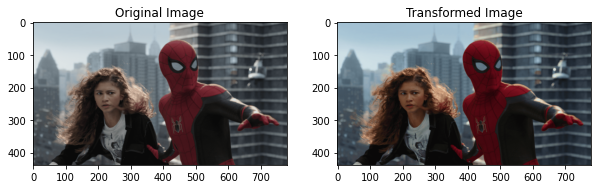

In [52]:
img_hsv_planes = [img_h, img_s_transformed, img_v]
img_hsv_transformed = cv.merge(img_hsv_planes)
img_transformed = cv.cvtColor(img_hsv_transformed, cv.COLOR_HSV2BGR)

#display the transoformation
fig, ax = plt.subplots(1,2, figsize=(10,7))

ax[0].imshow(img_orig[:,:,::-1])
ax[0].set_title('Original Image')
ax[1].imshow(img_transformed[:,:,::-1])
ax[1].set_title('Transformed Image')
plt.show()


Question 5

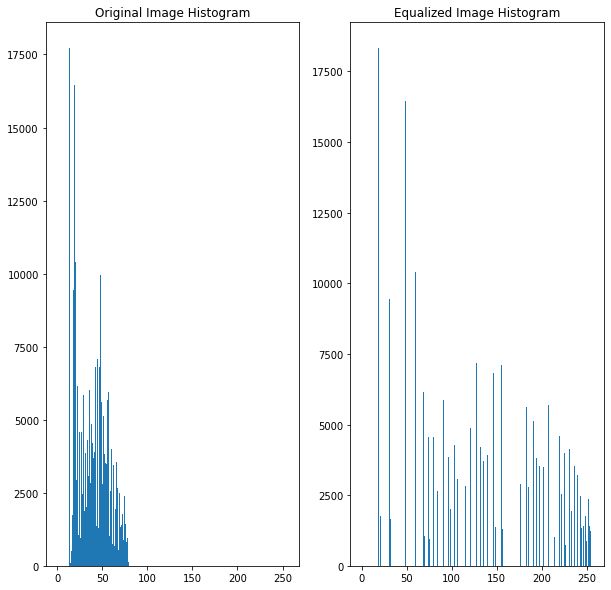

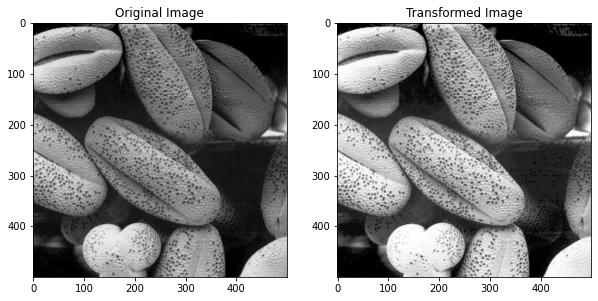

In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/shells.tif', cv.IMREAD_GRAYSCALE)

# Histogram Equalization Function
def hist_equalization(img):
    hist = np.zeros(256)
    # Calculate histogram
    for i in range(len(img)):
        for j in range(len(img[0])):
            hist[img[i, j]] += 1
    cdf = hist.cumsum()   #Cumulative Distribution Function
    cdf_normalized = (255*cdf)/(img.shape[0]*img.shape[1])  #Normalized CDF
    equalized_img = np.interp(img.flatten(), range(256), cdf_normalized).reshape(img.shape)
    return equalized_img.astype(np.uint8)

#Apply function to the image
img_equalized = hist_equalization(img_orig)

#Plot Original and Tranaformed Histograms
fig, ax = plt.subplots(1,2, figsize=(10, 10))
ax[0].hist(img_orig.flatten(), 256, [0,256])
ax[0].set_title('Original Image Histogram')
ax[1].hist(img_equalized.flatten(), 256, [0,256])
ax[1].set_title('Equalized Image Histogram')
plt.show()

#Plot Original and Tranaformed Images
fig, ax = plt.subplots(1,2, figsize=(10, 12))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(img_equalized, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()

    

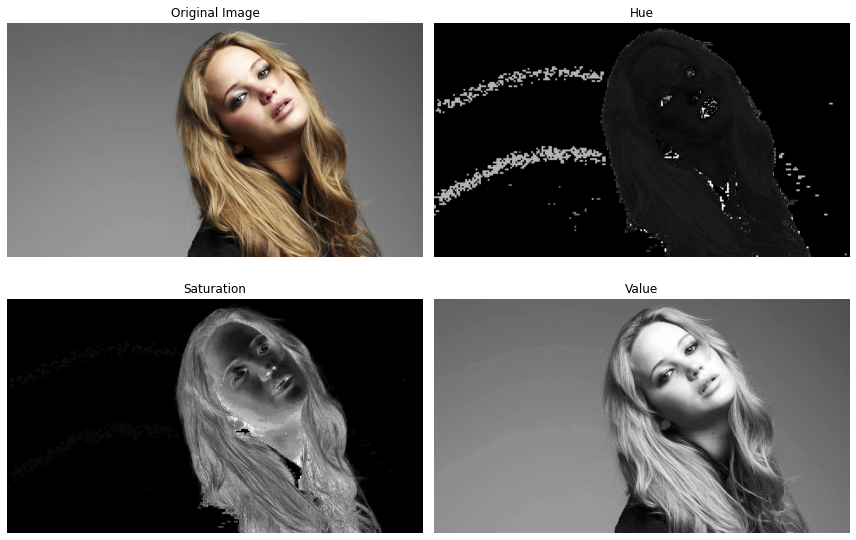

In [73]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/jeniffer.jpg')

# Split into HSV channels
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_h, img_s ,img_v = cv.split(img_hsv)

fig, ax = plt.subplots(2,2, figsize=(12,8))
ax[0,0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(img_h, cmap='gray')
ax[0,1].set_title('Hue')
ax[0,1].axis('off')

ax[1,0].imshow(img_s, cmap='gray')
ax[1,0].set_title('Saturation')
ax[1,0].axis('off')

ax[1,1].imshow(img_v, cmap='gray')
ax[1,1].set_title('Value')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

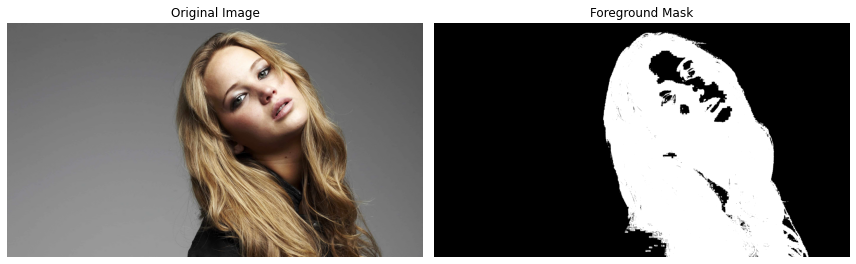

In [130]:
# Applying threshold to the saturation plane
threshold = 45
_,mask = cv.threshold(img_s, threshold,255,cv.THRESH_BINARY)

#Display Mask
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Foreground Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

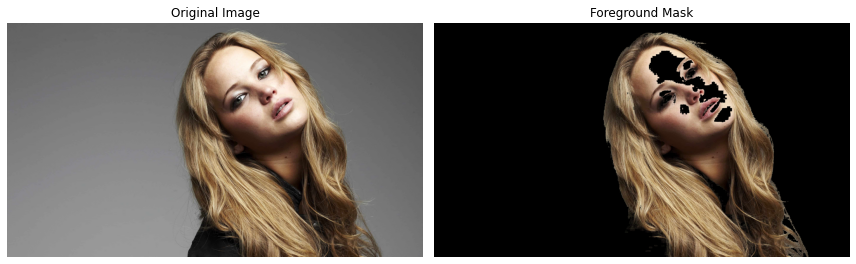

In [131]:
#Convert mask into BGR
mask = cv.cvtColor(mask.astype('uint8'), cv.COLOR_GRAY2BGR)

#Obtain foreground using only cv.bitwise
img_foreground = cv.bitwise_and(img_orig,mask)
hist  = cv.calcHist([img_foreground], [0], mask[:,:,0], [256], [0,256])

#display the foreground
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_foreground, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

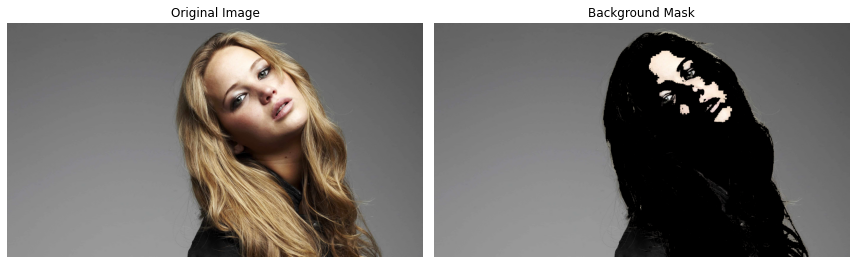

In [132]:
#Obtaining cumulative sum of the histogram
cum_sum = np.cumsum(hist)

#total number of pixels in the image
MN = len(img_orig)*len(img_orig[0])

#Histogram Equalization Formula
def hist_equal(x):
    return 255*cum_sum[x]/MN

#Splitting foreground into HSV planes
fg_hsv = cv.cvtColor(img_foreground, cv.COLOR_BGR2HSV)
sat = fg_hsv[:,:,1]

#Histogram Equalizing s-plane
s = np.vectorize(hist_equal)(sat)
fg_hsv[:,:,1] = s

#Converting foreground to BGR
img_foreground = cv.cvtColor(fg_hsv, cv.COLOR_HSV2BGR)

#Extracting Background
img_background = cv.bitwise_and(img_orig, cv.bitwise_not(mask))

#Plot Background
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_background, cv.COLOR_BGR2RGB))
ax[1].set_title('Background Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

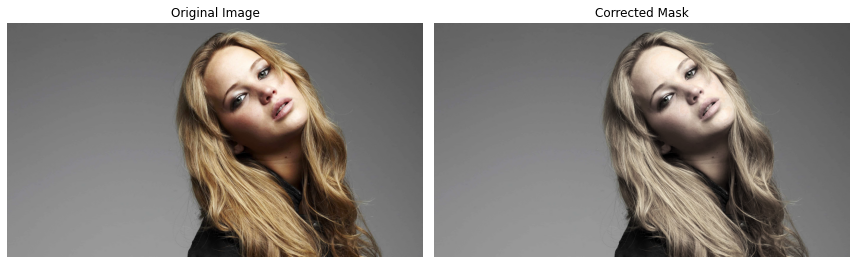

In [133]:
#Adding Background and Foreground
img_corrected = cv.add(img_foreground, img_background)

#Plot Background
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
ax[1].set_title('Corrected Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

Question 7

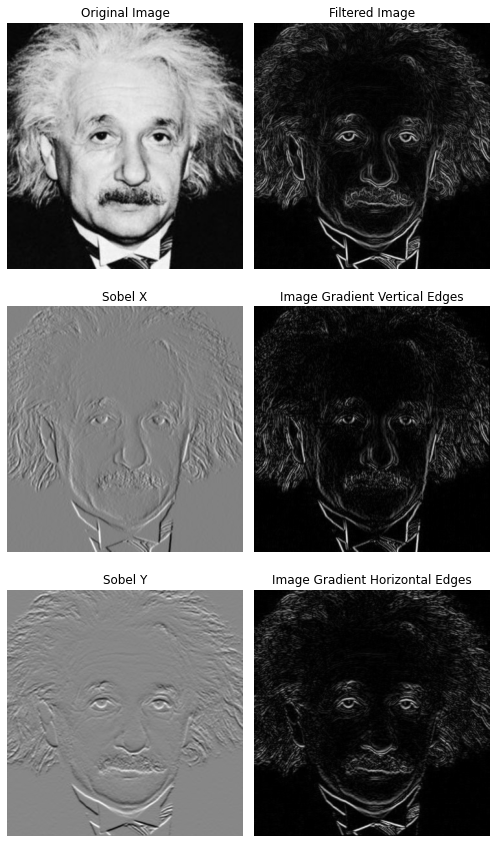

In [169]:
# Filter with Sobel cv.filter2D
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/einstein.png', cv.IMREAD_GRAYSCALE)

y_ker = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
x_ker = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

sobel_x = cv.filter2D(img_orig, cv.CV_64F, x_ker)
sobel_y = cv.filter2D(img_orig, cv.CV_64F, y_ker)

grad_x = np.sqrt(sobel_x**2)
grad_y = np.sqrt(sobel_y**2)

grad = np.sqrt(sobel_x**2+ sobel_y**2)

fig, ax = plt.subplots(3,2,figsize=(7,12))
ax[0,0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(grad, cmap='gray')
ax[0,1].set_title('Filtered Image')
ax[0,1].axis('off')

ax[1,0].imshow(sobel_x, cmap='gray')
ax[1,0].set_title('Sobel X')
ax[1,0].axis('off')

ax[1,1].imshow(grad_x, cmap='gray')
ax[1,1].set_title('Image Gradient Vertical Edges')
ax[1,1].axis('off')

ax[2,0].imshow(sobel_y, cmap='gray')
ax[2,0].set_title('Sobel Y')
ax[2,0].axis('off')

ax[2,1].imshow(grad_y, cmap='gray')
ax[2,1].set_title('Image Gradient Horizontal Edges')
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

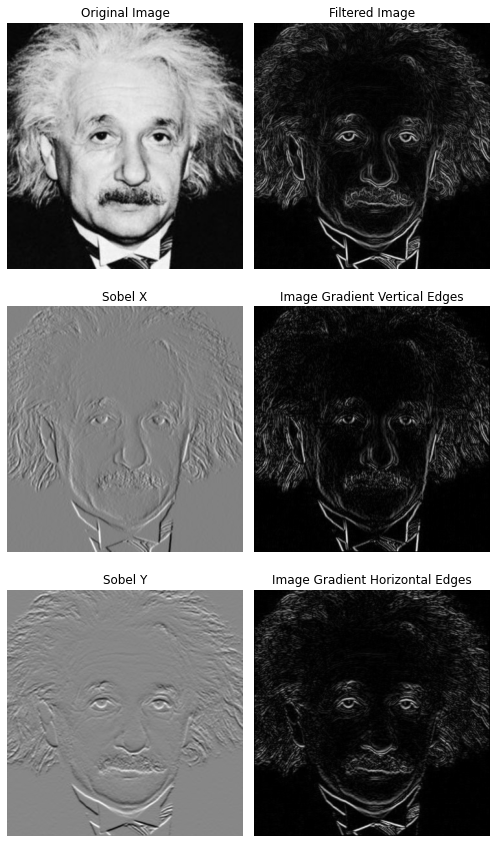

In [174]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Filter with Sobel using own function
def sobel_filter(img):
    y_ker = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    x_ker = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

    sobel_x = np.zeros(img.shape,dtype='float')
    sobel_y = np.zeros(img.shape,dtype='float')

    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            sobel_x[i,j] = np.sum(np.multiply(img[i-1:i+2, j-1:j+2], x_ker))
            sobel_y[i,j] = np.sum(np.multiply(img[i-1:i+2, j-1:j+2], y_ker))
    grad_x = np.sqrt(sobel_x**2)
    grad_y = np.sqrt(sobel_y**2)
    grad_mag = np.sqrt(sobel_x**2 +sobel_y**2 )

    return grad_x, grad_y, grad_mag

grad_x, grad_y, grad_mag = sobel_filter(img_orig)

fig, ax = plt.subplots(3,2,figsize=(7,12))
ax[0,0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(grad, cmap='gray')
ax[0,1].set_title('Filtered Image')
ax[0,1].axis('off')

ax[1,0].imshow(sobel_x, cmap='gray')
ax[1,0].set_title('Sobel X')
ax[1,0].axis('off')

ax[1,1].imshow(grad_x, cmap='gray')
ax[1,1].set_title('Image Gradient Vertical Edges')
ax[1,1].axis('off')

ax[2,0].imshow(sobel_y, cmap='gray')
ax[2,0].set_title('Sobel Y')
ax[2,0].axis('off')

ax[2,1].imshow(grad_y, cmap='gray')
ax[2,1].set_title('Image Gradient Horizontal Edges')
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

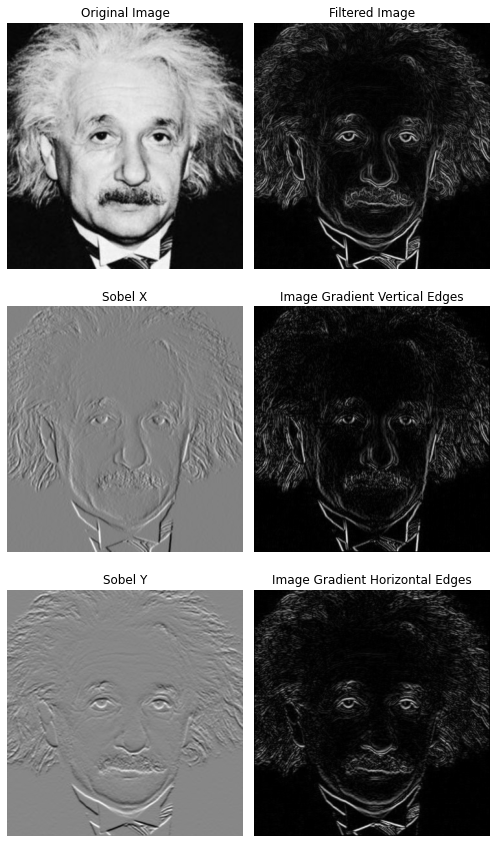

In [176]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Filter with Sobel operator using Matrix multiplication 
def sobel_filter1D(img):
    x_ver = np.array([[1], [2], [1]], dtype='float')
    x_hor = np.array([[-1, 0, 1]], dtype='float')

    y_ver = np.array([[1], [0], [-1]], dtype='float')
    y_hor = np.array([[-1, -2, -1]], dtype='float')

    vertical_x_result = cv.filter2D(img, cv.CV_64F, x_ver)
    sob_x = cv.filter2D(vertical_x_result, cv.CV_64F, x_hor)

    vertical_x_result = cv.filter2D(img, cv.CV_64F, x_ver)
    sob_y = cv.filter2D(vertical_x_result, cv.CV_64F, x_hor)

    grad_x = np.sqrt(sob_x**2)
    grad_y = np.sqrt(sob_y**2)
    grad_mag = np.sqrt(sob_x**2 +sob_y**2 )

    return grad_x, grad_y, grad_mag

grad_x, grad_y, grad_mag = sobel_filter(img_orig)

fig, ax = plt.subplots(3,2,figsize=(7,12))
ax[0,0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(grad, cmap='gray')
ax[0,1].set_title('Filtered Image')
ax[0,1].axis('off')

ax[1,0].imshow(sobel_x, cmap='gray')
ax[1,0].set_title('Sobel X')
ax[1,0].axis('off')

ax[1,1].imshow(grad_x, cmap='gray')
ax[1,1].set_title('Image Gradient Vertical Edges')
ax[1,1].axis('off')

ax[2,0].imshow(sobel_y, cmap='gray')
ax[2,0].set_title('Sobel Y')
ax[2,0].axis('off')

ax[2,1].imshow(grad_y, cmap='gray')
ax[2,1].set_title('Image Gradient Horizontal Edges')
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

Question 8

In [180]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Zoom Image by using Nearest Neighbour Interpolation
def zoom_nearest_neighbour(img, zoom_factor):
    new_img_size = (img.shape[0] * zoom_factor, img.shape[1] * zoom_factor, img.shape[2])
    new_img_height = new_img_size[0]
    new_img_width = new_img_size[1]
    new_img = np.zeros(new_img_size, dtype=np.uint8)
    for i in range(new_img_height):
        for j in range(new_img_width):
            new_img[i,j] = img[int(i/zoom_factor), int(j/zoom_factor)]
    return new_img

# Zoom Image by using Bilinear Interpolation
def zoom_bilinear(img, zoom_factor):
    new_img_size = (img.shape[0] * zoom_factor, img.shape[1] * zoom_factor, img.shape[2])
    new_img_height = new_img_size[0]
    new_img_width = new_img_size[1]
    new_img = np.zeros(new_img_size, dtype=np.uint8)
    for i in range(new_img_height):
        for j in range(new_img_width):
            x = int(i/zoom_factor)
            y = int(j/zoom_factor)
            a = i/zoom_factor - x
            b = j/zoom_factor - y
            if x == img.shape[0]-1 or y == img.shape[1]-1:
                new_img[i,j] = img[x,y]
            else:
                new_img[i,j] = (1-a)*(1-b)*img[x,y] + (1-a)*b*img[x, y+1] + a*(1-b)*img[x+1,y] + a*b*img[x+1,y+1]
    return new_img      

Small image size :  (270, 480, 3)
Real image size :  (1080, 1920, 3)
Zoomed image size (nni):  (1080, 1920, 3)
Zoomed image size (bli):  (1080, 1920, 3)


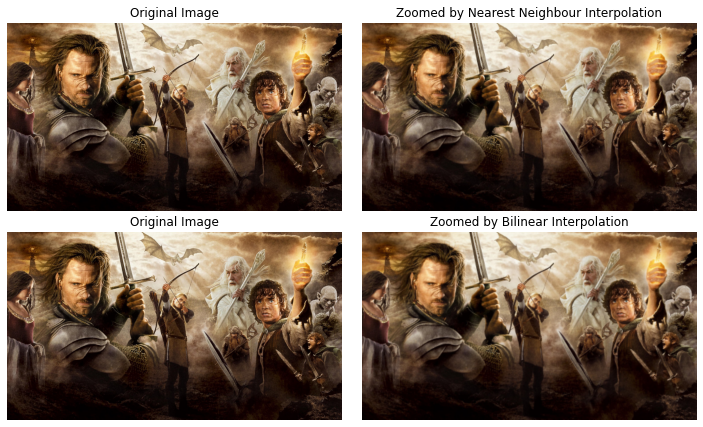

Normalized SSD (Nearest Neighbour Interpolation):  31.284316486625514
Normalized SSD (Bilinear Interpolation):  39.240651041666666


In [218]:

real = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/im01.png'
small = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/im01small.png'

real_sized_image = cv.imread(real, cv.IMREAD_COLOR)
small_image = cv.imread(small, cv.IMREAD_COLOR)

print("Small image size : ", small_image.shape)
print("Real image size : ", real_sized_image.shape)

zoom_factor = 4

new_image_nni = zoom_nearest_neighbour(small_image, zoom_factor)
new_image_bli = zoom_bilinear(small_image, zoom_factor)

print("Zoomed image size (nni): ", new_image_nni.shape)
print("Zoomed image size (bli): ", new_image_bli.shape)

fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(new_image_nni, cv.COLOR_BGR2RGB))
ax[0,1].set_title('Zoomed by Nearest Neighbour Interpolation')
ax[0,1].axis('off')

ax[1,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Original Image')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(new_image_bli, cv.COLOR_BGR2RGB))
ax[1,1].set_title('Zoomed by Bilinear Interpolation')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

# Sum of squared difference(SSD) between the original and zoomed images
ssd_nni = np.sum((real_sized_image - new_image_nni)**2)
ssd_bli = np.sum((real_sized_image - new_image_bli)**2)

num_pixels = real_sized_image.shape[0] * real_sized_image.shape[1] * real_sized_image.shape[2]
print("Normalized SSD (Nearest Neighbour Interpolation): ", ssd_nni/num_pixels)
print("Normalized SSD (Bilinear Interpolation): ", ssd_bli/num_pixels)


Small image size :  (300, 480, 3)
Real image size :  (1200, 1920, 3)
Zoomed image size (nni):  (1200, 1920, 3)
Zoomed image size (bli):  (1200, 1920, 3)


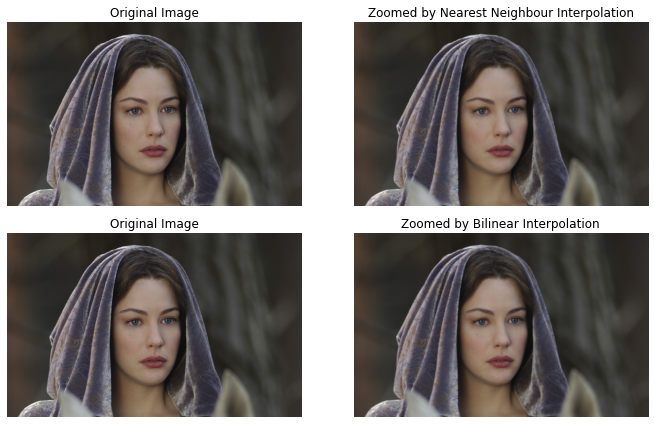

Normalized SSD (Nearest Neighbour Interpolation):  11.902013310185184
Normalized SSD (Bilinear Interpolation):  16.20416898148148


In [219]:

real = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/im02.png'
small = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/im02small.png'

real_sized_image = cv.imread(real, cv.IMREAD_COLOR)
small_image = cv.imread(small, cv.IMREAD_COLOR)

print("Small image size : ", small_image.shape)
print("Real image size : ", real_sized_image.shape)

zoom_factor = 4

new_image_nni = zoom_nearest_neighbour(small_image, zoom_factor)
new_image_bli = zoom_bilinear(small_image, zoom_factor)

print("Zoomed image size (nni): ", new_image_nni.shape)
print("Zoomed image size (bli): ", new_image_bli.shape)

fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(new_image_nni, cv.COLOR_BGR2RGB))
ax[0,1].set_title('Zoomed by Nearest Neighbour Interpolation')
ax[0,1].axis('off')

ax[1,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Original Image')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(new_image_bli, cv.COLOR_BGR2RGB))
ax[1,1].set_title('Zoomed by Bilinear Interpolation')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

# Sum of squared difference(SSD) between the original and zoomed images
ssd_nni = np.sum((real_sized_image - new_image_nni)**2)
ssd_bli = np.sum((real_sized_image - new_image_bli)**2)

num_pixels = real_sized_image.shape[0] * real_sized_image.shape[1] * real_sized_image.shape[2]
print("Normalized SSD (Nearest Neighbour Interpolation): ", ssd_nni/num_pixels)
print("Normalized SSD (Bilinear Interpolation): ", ssd_bli/num_pixels)


Small image size (bli):  (365, 600, 3)
Real image size (bli):  (1460, 2400, 3)
Zoomed image size (nni):  (1460, 2400, 3)
Zoomed image size (bli):  (1460, 2400, 3)


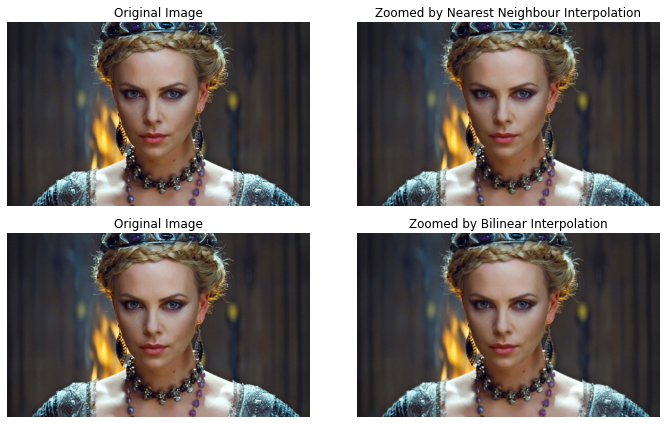

Normalized SSD (Nearest Neighbour Interpolation):  16.552125761035008
Normalized SSD (Bilinear Interpolation):  22.970855783866057


In [220]:

real = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/im03.png'
small = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/im03small.png'

real_sized_image = cv.imread(real, cv.IMREAD_COLOR)
small_image = cv.imread(small, cv.IMREAD_COLOR)

print("Small image size (bli): ", small_image.shape)
print("Real image size (bli): ", real_sized_image.shape)

zoom_factor = 4

new_image_nni = zoom_nearest_neighbour(small_image, zoom_factor)
new_image_bli = zoom_bilinear(small_image, zoom_factor)

print("Zoomed image size (nni): ", new_image_nni.shape)
print("Zoomed image size (bli): ", new_image_bli.shape)

fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(new_image_nni, cv.COLOR_BGR2RGB))
ax[0,1].set_title('Zoomed by Nearest Neighbour Interpolation')
ax[0,1].axis('off')

ax[1,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Original Image')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(new_image_bli, cv.COLOR_BGR2RGB))
ax[1,1].set_title('Zoomed by Bilinear Interpolation')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

# Sum of squared difference(SSD) between the original and zoomed images
ssd_nni = np.sum((real_sized_image - new_image_nni)**2)
ssd_bli = np.sum((real_sized_image - new_image_bli)**2)

num_pixels = real_sized_image.shape[0] * real_sized_image.shape[1] * real_sized_image.shape[2]
print("Normalized SSD (Nearest Neighbour Interpolation): ", ssd_nni/num_pixels)
print("Normalized SSD (Bilinear Interpolation): ", ssd_bli/num_pixels)


Small Image Size:  (112, 200, 3)
Real image Size:  (448, 800, 3)
Zoomed image size (nni):  (448, 800, 3)
Zoomed image size (bli):  (448, 800, 3)


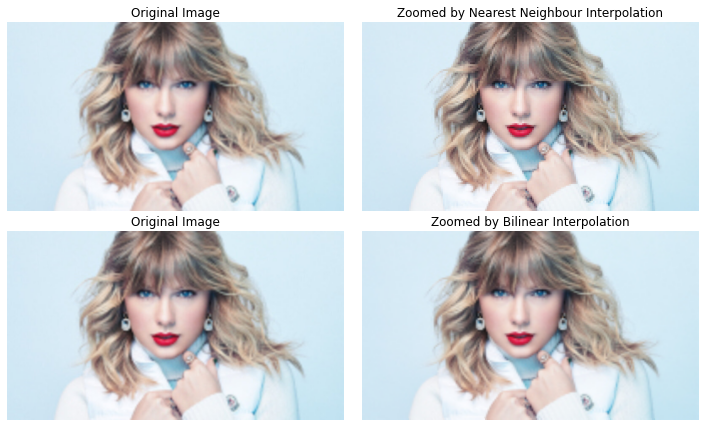

Normalized SSD (Nearest Neighbour Interpolation):  16.786385788690477
Normalized SSD (Bilinear Interpolation):  20.45930896577381


In [221]:

real = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/taylor.jpg'
small = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/taylor_small.jpg'

real_sized_image = cv.imread(real, cv.IMREAD_COLOR)
small_image = cv.imread(small, cv.IMREAD_COLOR)

print("Small Image Size: ", small_image.shape)
print("Real image Size: ", real_sized_image.shape)

zoom_factor = 4

new_image_nni = zoom_nearest_neighbour(small_image, zoom_factor)
new_image_bli = zoom_bilinear(small_image, zoom_factor)

print("Zoomed image size (nni): ", new_image_nni.shape)
print("Zoomed image size (bli): ", new_image_bli.shape)

fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(new_image_nni, cv.COLOR_BGR2RGB))
ax[0,1].set_title('Zoomed by Nearest Neighbour Interpolation')
ax[0,1].axis('off')

ax[1,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Original Image')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(new_image_bli, cv.COLOR_BGR2RGB))
ax[1,1].set_title('Zoomed by Bilinear Interpolation')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

# Sum of squared difference(SSD) between the original and zoomed images
ssd_nni = np.sum((real_sized_image - new_image_nni)**2)
ssd_bli = np.sum((real_sized_image - new_image_bli)**2)

num_pixels = real_sized_image.shape[0] * real_sized_image.shape[1] * real_sized_image.shape[2]
print("Normalized SSD (Nearest Neighbour Interpolation): ", ssd_nni/num_pixels)
print("Normalized SSD (Bilinear Interpolation): ", ssd_bli/num_pixels)


In [222]:

real = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/taylor_small.jpg'
small = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/taylor_very_small.jpg'

real_sized_image = cv.imread(real, cv.IMREAD_COLOR)
small_image = cv.imread(small, cv.IMREAD_COLOR)

print("Small Image Size: ", small_image.shape)
print("Real image Size: ", real_sized_image.shape)

zoom_factor = 4

new_image_nni = zoom_nearest_neighbour(small_image, zoom_factor)
new_image_bli = zoom_bilinear(small_image, zoom_factor)

print("Zoomed image size (nni): ", new_image_nni.shape)
print("Zoomed image size (bli): ", new_image_bli.shape)

fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(new_image_nni, cv.COLOR_BGR2RGB))
ax[0,1].set_title('Zoomed by Nearest Neighbour Interpolation')
ax[0,1].axis('off')

ax[1,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Original Image')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(new_image_bli, cv.COLOR_BGR2RGB))
ax[1,1].set_title('Zoomed by Bilinear Interpolation')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

# Sum of squared difference(SSD) between the original and zoomed images
ssd_nni = np.sum((real_sized_image - new_image_nni)**2)
ssd_bli = np.sum((real_sized_image - new_image_bli)**2)

num_pixels = real_sized_image.shape[0] * real_sized_image.shape[1] * real_sized_image.shape[2]
print("Normalized SSD (Nearest Neighbour Interpolation): ", ssd_nni/num_pixels)
print("Normalized SSD (Bilinear Interpolation): ", ssd_bli/num_pixels)


Small Image Size:  (28, 50, 3)
Real image Size:  (112, 200, 3)
Zoomed image size (nni):  (112, 200, 3)
Zoomed image size (bli):  (112, 200, 3)


Normalized SSD (Nearest Neighbour Interpolation):  39.3728125
Normalized SSD (Bilinear Interpolation):  44.694880952380956


In [223]:

real = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/taylor.jpg'
small = 'C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/a1q5images/taylor_very_small.jpg'

real_sized_image = cv.imread(real, cv.IMREAD_COLOR)
small_image = cv.imread(small, cv.IMREAD_COLOR)

print("Small Image Size: ", small_image.shape)
print("Real image Size: ", real_sized_image.shape)

zoom_factor = 16

new_image_nni = zoom_nearest_neighbour(small_image, zoom_factor)
new_image_bli = zoom_bilinear(small_image, zoom_factor)

print("Zoomed image size (nni): ", new_image_nni.shape)
print("Zoomed image size (bli): ", new_image_bli.shape)

fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(new_image_nni, cv.COLOR_BGR2RGB))
ax[0,1].set_title('Zoomed by Nearest Neighbour Interpolation')
ax[0,1].axis('off')

ax[1,0].imshow(cv.cvtColor(real_sized_image, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Original Image')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(new_image_bli, cv.COLOR_BGR2RGB))
ax[1,1].set_title('Zoomed by Bilinear Interpolation')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

# Sum of squared difference(SSD) between the original and zoomed images
ssd_nni = np.sum((real_sized_image - new_image_nni)**2)
ssd_bli = np.sum((real_sized_image - new_image_bli)**2)

num_pixels = real_sized_image.shape[0] * real_sized_image.shape[1] * real_sized_image.shape[2]
print("Normalized SSD (Nearest Neighbour Interpolation): ", ssd_nni/num_pixels)
print("Normalized SSD (Bilinear Interpolation): ", ssd_bli/num_pixels)


Small Image Size:  (28, 50, 3)
Real image Size:  (448, 800, 3)
Zoomed image size (nni):  (448, 800, 3)
Zoomed image size (bli):  (448, 800, 3)


Normalized SSD (Nearest Neighbour Interpolation):  37.6897265625
Normalized SSD (Bilinear Interpolation):  45.263658854166664


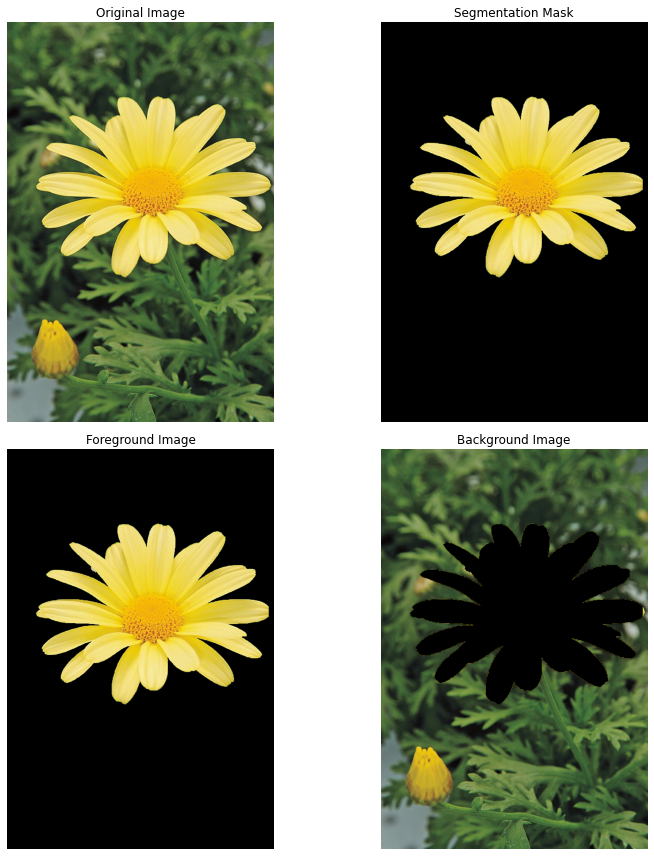

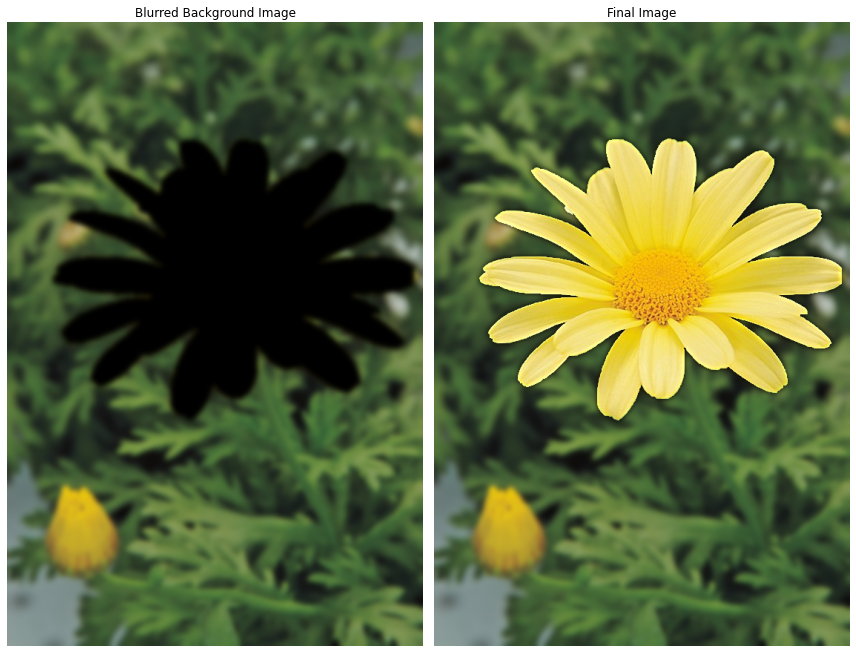

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv. imread('C:/Users/HPA02532Y/Documents/GitHub/IPMVA01/a1images/daisy.jpg', cv.IMREAD_COLOR)

# Create a mask and initialize bgdModel and fgdModel
mask = np.zeros(img_orig.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define the rectangle for the initial GrabCut
rect = (50, 100, 500, 450)
cv.grabCut(img_orig, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to create a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image
img_segmented = img_orig * mask2[:, :, np.newaxis]

fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(img_orig * mask2[:, :, np.newaxis], cv.COLOR_BGR2RGB))
ax[0,1].set_title('Segmentation Mask')
ax[0,1].axis('off')

ax[1,0].imshow(cv.cvtColor(img_orig * mask2[:, :, np.newaxis], cv.COLOR_BGR2RGB))
ax[1,0].set_title('Foreground Image')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(img_orig * (1 - mask2)[:, :, np.newaxis], cv.COLOR_BGR2RGB))
ax[1,1].set_title('Background Image')
ax[1,1].axis('off')

plt.tight_layout()
plt.show()

#blurr background image
img_blurred = cv.GaussianBlur(img_orig * (1 - mask2)[:, :, np.newaxis], (21, 21), 0)

#adding foreground and background
img_final = cv.add(img_orig * mask2[:, :, np.newaxis], img_blurred, dtype=cv.CV_8UC3)

#show blurred background image
fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(cv.cvtColor(img_blurred, cv.COLOR_BGR2RGB))
ax[0].set_title('Blurred Background Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_final, cv.COLOR_BGR2RGB))
ax[1].set_title('Final Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()